In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [3]:
np.set_printoptions(precision=2, edgeitems=1000, linewidth=1000, threshold=1000)

In [4]:
G = 1
N = 19

In [5]:
la = G + (N % 3)
lb = G + (N % 5)
na = 2 + (G % 2)
nb = 2 + (N % 2)
ra = 4 + (G % 2)
rb = 5 - (G % 2)

print(f"""λ_A = {la}
λ_B = {lb}
N_A = {na}
N_B = {nb}
R_A = {ra}
R_B = {rb}""")

λ_A = 2
λ_B = 5
N_A = 3
N_B = 3
R_A = 5
R_B = 4


In [6]:
class S:
    def __init__(self, x, y, a1, a2, b1, b2, color='#0000ff33'):
        self.x = x
        self.y = y
        self.a1 = a1
        self.a2 = a2
        self.b1 = b1
        self.b2 = b2
        
        self.color=color
                 
        
    def plot_S(self):
        plt.scatter([self.x], [self.y], s=1000, color=self.color)
        plt.text(
            self.x-0.2, 
            self.y-0.2, 
            f'$S^{{{f"{self.a1}{self.a2}"}}}_{{{f"{self.b1}{self.b2}"}}}$'
        )

class ArrowA:
    def __init__(self, x, y, color='#00ff0033'):
        self.x = x
        self.y = y
        
        self.color=color
             
        
    def plot_arrow(self):
        dx = -1
        dy = -1
        plt.arrow(self.x, self.y, dx, dy, width=0.2, color=self.color)
        plt.text((self.x+dx), (self.y+dy), f'$λ_A$')

class ArrowB:
    def __init__(self, x, y, color='#ff000033'):
        self.x = x
        self.y = y
        
        self.color=color
             
        
    def plot_arrow(self):
        dx = 1
        dy = -1
        plt.arrow(self.x, self.y, dx, dy, width=0.2, color=self.color)
        plt.text((self.x+dx), (self.y+dy), f'$λ_B$')



class Graph:
    def __init__(self, a1, a2, b1, b2):
        self.a1 = a1
        self.a2 = a2
        self.b1 = b1
        self.b2 = b2
        
        self.SS, self.ArrowAS, self.ArrowBS = self.gen_S(self.a1, self.a2, self.b1, self.b2)
        
        self.A = np.zeros((len(self.SS), len(self.SS)))
  
    @staticmethod 
    def gen_S(a1, a2, b1, b2):
        SS = []
        ArrowAS = []
        ArrowBS = []
        
        def isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2):
            if x1 > 0 and y1+y2 > b1-1:
                ArrowAS.append(ArrowA(x, y))
            if x1 > 0 and y1+y2 > b1-1:
                ArrowBS.append(ArrowB(x, y))
                
        for i in range(rb-nb+2):
            y1 = b1
            y2 = b2 - i
            if y2>=0:
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2*i
                    
                    x1 = a1 
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                        
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
            else:
                y1 = b2+b1-i
                y2 = 0
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2 *i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)

        return SS[:-1], ArrowAS, ArrowBS
    
    @staticmethod 
    def gen_matrix_A(d, a1, a2, b1, b2):
        SS = []
        ArrowAS = []
        ArrowBS = []
        
        A = np.zeros((len(d), len(d)))
        
        def isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2):
            if x1 > 0 and y1+y2 > b1-1:
                ArrowAS.append(ArrowA(x, y))
                if x2 != 0:
                    A[d.index((x1, x2, y1, y2))][d.index((x1, x2-1, y1, y2))] = la*x1
                else:
                    A[d.index((x1, x2, y1, y2))][d.index((x1-1, 0, y1, y2))] = la*x1
            if x1 > 0 and y1+y2 > b1-1:
                ArrowBS.append(ArrowB(x, y))
#                 A[d.index((x1, x2, y1, y2))] = 1
                if y2 != 0:
                    A[d.index((x1, x2, y1, y2))][d.index((x1, x2, y1, y2-1))] = lb*y1
                else:
                    A[d.index((x1, x2, y1, y2))][d.index((x1, x2, y1-1, 0))] = lb*y1
                
        for i in range(b1):
            y1 = b1
            y2 = b2 - i
            if y2>=0:
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2*i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                        
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
            else:
                y1 = b2+b1-i
                y2 = 0
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2 *i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
        A = A - np.diag(A.sum(axis=1))
                        
        return A
    
    

    def plot_graph(self):
        plt.figure(figsize=(10,10))
        plt.xlim(-12,12)
        plt.ylim(-23,1)
        
        for s in self.SS:
            s.plot_S()
            
        for s in self.ArrowAS:
            s.plot_arrow()
            
        for s in self.ArrowBS:
            s.plot_arrow()
         
        # plt.grid()

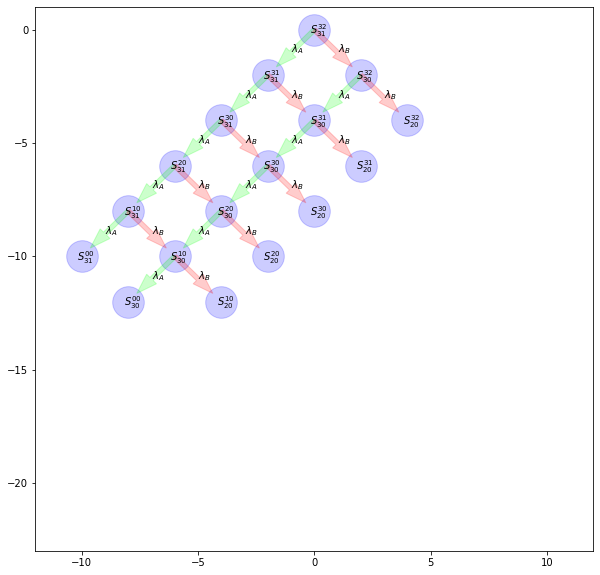

In [7]:
a1 = na
a2 = ra - na

b1 = nb 
b2 = rb - nb
g = Graph(a1,a2,b1,b2)
g.plot_graph()

In [8]:
from IPython.display import display, Math

In [9]:
A = list(np.zeros((rb - nb + 2, ra+1)).reshape(-1))

a = np.array([i.a1 for i in g.SS])
b = np.array([i.a2 for i in g.SS])
c = np.array([i.b1 for i in g.SS])
d = np.array([i.b2 for i in g.SS])

it = 0

for i, j, k, l, m in zip(a, b, c, d, range(len(a))):
    A[it] = (i, j, k, l)
    it+=1


matrix = np.array(A).reshape(rb - nb + 2, ra+1)
diags = [list(matrix[::-1,:].diagonal(i)) for i in range(-matrix.shape[0]+1,matrix.shape[1])][:-1]
diags = sum(diags, [])
display(diags)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9452\2173197211.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matrix = np.array(A).reshape(rb - nb + 2, ra+1)


[(3, 2, 3, 1),
 (3, 2, 3, 0),
 (3, 1, 3, 1),
 (3, 2, 2, 0),
 (3, 1, 3, 0),
 (3, 0, 3, 1),
 (3, 1, 2, 0),
 (3, 0, 3, 0),
 (2, 0, 3, 1),
 (3, 0, 2, 0),
 (2, 0, 3, 0),
 (1, 0, 3, 1),
 (2, 0, 2, 0),
 (1, 0, 3, 0),
 (0, 0, 3, 1),
 (1, 0, 2, 0),
 (0, 0, 3, 0)]

In [10]:
a = np.array([i[0] for i in diags])
b = np.array([i[1] for i in diags])
c = np.array([i[2] for i in diags])
d = np.array([i[3] for i in diags])


for i, j, k, l, m in zip(a, b, c, d, range(len(a))):
    display(Math(f'$S_{{{m}}} = S^{{{f"{i}{j}"}}}_{{{f"{k}{l}"}}}$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
A = g.gen_matrix_A(diags, g.a1, g.a2, g.b1, g.b2)
display(sp.Matrix(A))
display(sp.Matrix())

Matrix([
[-21.0,  15.0,   6.0,    0,     0,     0,    0,     0,     0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0, -21.0,     0, 15.0,   6.0,     0,    0,     0,     0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0,     0, -21.0,    0,  15.0,   6.0,    0,     0,     0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0,     0,     0,    0,     0,     0,    0,     0,     0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0,     0,     0,    0, -21.0,     0, 15.0,   6.0,     0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0,     0,     0,    0,     0, -21.0,    0,  15.0,   6.0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0,     0,     0,    0,     0,     0,    0,     0,     0,    0,     0,     0,    0,     0,   0,    0,   0],
[    0,     0,     0,    0,     0,     0,    0, -21.0,     0, 15.0,   6.0,     0,    0,     0,   0,    0,   0],
[    0,     0,     0,    0,     0,     0,    0,     0, -19.0,    0,  15.0,   4.0,    0,     0, 

Matrix(0, 0, [])

In [12]:
t = sp.symbols('t')
p = [sp.symbols(f'p_{i}', cls=sp.Function) for i in range(len(A))]

In [13]:
nonterminal = []
eqs = []
index = 0
AT = A.T

for i in range(len(A)):
    eq1 = 0
    eq2 = 0

    for j in np.where(A[i] > 0)[0]:
        eq1 = A[i][j]*p[i](t) + eq1

        eq = -eq1
    if i == 0:
        eq2 = 0
        
    else:
        for index in np.where(AT[i] > 0)[0]:
            eq2 = AT[i][index]
            eq = eq + eq2 * p[index](t)
        if eq1 != 0:
            nonterminal.append(i)

    eqs.append(sp.Eq(p[i](t).diff(t), eq))

for i in eqs:
    display(i)

Eq(Derivative(p_0(t), t), -21.0*p_0(t))

Eq(Derivative(p_1(t), t), 15.0*p_0(t) - 21.0*p_1(t))

Eq(Derivative(p_2(t), t), 6.0*p_0(t) - 21.0*p_2(t))

Eq(Derivative(p_3(t), t), 6.0*p_0(t) + 15.0*p_1(t) - 21.0*p_2(t))

Eq(Derivative(p_4(t), t), 6.0*p_1(t) + 15.0*p_2(t) - 21.0*p_4(t))

Eq(Derivative(p_5(t), t), 6.0*p_2(t) - 21.0*p_5(t))

Eq(Derivative(p_6(t), t), 6.0*p_2(t) + 15.0*p_4(t) - 21.0*p_5(t))

Eq(Derivative(p_7(t), t), 6.0*p_4(t) + 15.0*p_5(t) - 21.0*p_7(t))

Eq(Derivative(p_8(t), t), 6.0*p_5(t) - 19.0*p_8(t))

Eq(Derivative(p_9(t), t), 6.0*p_5(t) + 15.0*p_7(t) - 19.0*p_8(t))

Eq(Derivative(p_10(t), t), -19.0*p_10(t) + 6.0*p_7(t) + 15.0*p_8(t))

Eq(Derivative(p_11(t), t), -17.0*p_11(t) + 4.0*p_8(t))

Eq(Derivative(p_12(t), t), 15.0*p_10(t) - 17.0*p_11(t) + 4.0*p_8(t))

Eq(Derivative(p_13(t), t), 4.0*p_10(t) + 15.0*p_11(t) - 17.0*p_13(t))

Eq(Derivative(p_14(t), t), 4.0*p_10(t) + 17.0*p_11(t) - 17.0*p_13(t))

Eq(Derivative(p_15(t), t), 4.0*p_10(t) + 17.0*p_11(t) - 2.0*p_13(t))

Eq(Derivative(p_16(t), t), 4.0*p_10(t) + 17.0*p_11(t))

In [14]:
nonterminal

[1, 2, 4, 5, 7, 8, 10, 11, 13]

In [15]:
ics = {p[i](0): 0 for i in range(len(A))}
ics[p[0](0)] = 1
ics

{p_0(0): 1,
 p_1(0): 0,
 p_2(0): 0,
 p_3(0): 0,
 p_4(0): 0,
 p_5(0): 0,
 p_6(0): 0,
 p_7(0): 0,
 p_8(0): 0,
 p_9(0): 0,
 p_10(0): 0,
 p_11(0): 0,
 p_12(0): 0,
 p_13(0): 0,
 p_14(0): 0,
 p_15(0): 0,
 p_16(0): 0}

In [16]:
for i in ics.keys():
    display(sp.Eq(i, ics[i]))

Eq(p_0(0), 1)

Eq(p_1(0), 0)

Eq(p_2(0), 0)

Eq(p_3(0), 0)

Eq(p_4(0), 0)

Eq(p_5(0), 0)

Eq(p_6(0), 0)

Eq(p_7(0), 0)

Eq(p_8(0), 0)

Eq(p_9(0), 0)

Eq(p_10(0), 0)

Eq(p_11(0), 0)

Eq(p_12(0), 0)

Eq(p_13(0), 0)

Eq(p_14(0), 0)

Eq(p_15(0), 0)

Eq(p_16(0), 0)

In [17]:
solutions = sp.dsolve(eqs, [i(t) for i in p], ics=ics)

In [18]:
for i in solutions:
    display(i)

Eq(p_0(t), 1.0*exp(-21.0*t))

Eq(p_1(t), 15.0*t*exp(-21.0*t) - 8.88178419700125e-16*exp(-21.0*t))

Eq(p_2(t), 6.0*t*exp(-21.0*t) - 2.22044604925031e-16*exp(-21.0*t))

Eq(p_3(t), -4.71428571428571*t*exp(-21.0*t) + 0.510204081632653 - 0.510204081632653*exp(-21.0*t))

Eq(p_4(t), 90.0*t**2*exp(-21.0*t) - 3.5527136788005e-15*exp(-21.0*t))

Eq(p_5(t), 18.0*t**2*exp(-21.0*t) + 1.77635683940025e-15*exp(-21.0*t))

Eq(p_6(t), -46.2857142857143*t**2*exp(-21.0*t) - 6.12244897959183*t*exp(-21.0*t) + 0.291545189504373 - 0.291545189504372*exp(-21.0*t))

Eq(p_7(t), 270.0*t**3*exp(-21.0*t) - 5.6843418860808e-14*t**2*exp(-21.0*t) + 5.6843418860808e-14*t*exp(-21.0*t) + 7.105427357601e-15*exp(-21.0*t))

Eq(p_8(t), -54.0*t**2*exp(-21.0*t) - 54.0*t*exp(-21.0*t) - 27.0*exp(-21.0*t) + 27.0*exp(-19.0*t))

Eq(p_9(t), -192.857142857143*t**3*exp(-21.0*t) - 81.5510204081632*t**2*exp(-21.0*t) - 56.6239067055394*t*exp(-21.0*t) + 0.124947938359017 - 27.124947938359*exp(-21.0*t) + 27.0*exp(-19.0*t))

Eq(p_10(t), -810.0*t**3*exp(-21.0*t) - 810.0*t**2*exp(-21.0*t) - 405.0*t*exp(-21.0*t) + 405.0*t*exp(-19.0*t) + 7.105427357601e-15*exp(-21.0*t))

Eq(p_11(t), 54.0*t**2*exp(-21.0*t) + 81.0*t*exp(-21.0*t) + 47.25*exp(-21.0*t) - 54.0*exp(-19.0*t) + 6.75*exp(-17.0*t))

Eq(p_12(t), 578.571428571429*t**3*exp(-21.0*t) + 715.224489795918*t**2*exp(-21.0*t) + 433.259475218659*t*exp(-21.0*t) - 319.736842105263*t*exp(-19.0*t) + 0.0539941229474153 + 64.0242607246981*exp(-21.0*t) - 70.8282548476454*exp(-19.0*t) + 6.75*exp(-17.0*t))

Eq(p_13(t), 810.0*t**3*exp(-21.0*t) + 1215.0*t**2*exp(-21.0*t) + 708.75*t*exp(-21.0*t) - 810.0*t*exp(-19.0*t) + 101.25*t*exp(-17.0*t))

Eq(p_14(t), 810.0*t**3*exp(-21.0*t) + 1209.85714285714*t**2*exp(-21.0*t) + 700.545918367347*t*exp(-21.0*t) - 810.0*t*exp(-19.0*t) + 101.25*t*exp(-17.0*t) + 0.000577674678894114 - 4.89067055393586*exp(-21.0*t) + 5.68421052631578*exp(-19.0*t) - 0.794117647058819*exp(-17.0*t))

Eq(p_15(t), 231.428571428571*t**3*exp(-21.0*t) + 259.34693877551*t**2*exp(-21.0*t) + 103.771137026239*t*exp(-21.0*t) - 170.526315789474*t*exp(-19.0*t) + 11.9117647058824*t*exp(-17.0*t) + 0.0171050213356668 - 33.3085172844648*exp(-21.0*t) + 39.3407202216066*exp(-19.0*t) - 6.04930795847751*exp(-17.0*t))

Eq(p_16(t), 154.285714285714*t**3*exp(-21.0*t) + 132.612244897959*t**2*exp(-21.0*t) + 24.201166180758*t*exp(-21.0*t) - 85.2631578947368*t*exp(-19.0*t) + 0.0193086675565698 - 37.097563515202*exp(-21.0*t) + 43.8282548476454*exp(-19.0*t) - 6.75*exp(-17.0*t))

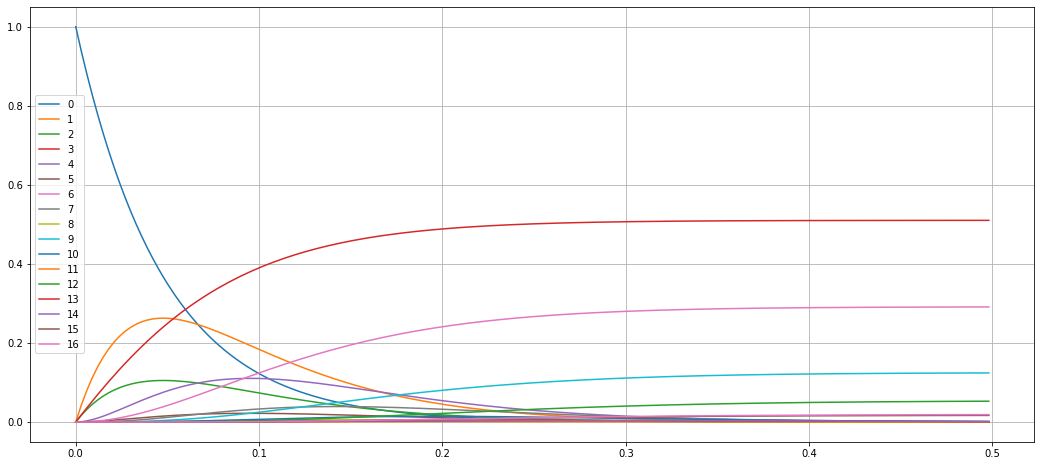

In [19]:
plt.figure(figsize=(18,8))

x_values = np.arange(0, 0.5, 0.3e-2)
for i in range(len(A)):
    y_values = np.zeros(len(x_values))
    for j in range(len(x_values)):
        y_values[j] = solutions[i].subs(t, x_values[j]).rhs
    plt.plot(x_values, y_values, label=i)
plt.legend()
plt.grid()
plt.show()

In [20]:
total_solution_nonterminal = sum(solutions[i].rhs for i in nonterminal)

In [21]:
p_nt = sp.symbols('p_NotTerm', cls=sp.Function)
sp.Eq(p_nt(t),total_solution_nonterminal)

Eq(p_NotTerm(t), 270.0*t**3*exp(-21.0*t) + 513.0*t**2*exp(-21.0*t) + 351.75*t*exp(-21.0*t) - 405.0*t*exp(-19.0*t) + 101.25*t*exp(-17.0*t) + 20.25*exp(-21.0*t) - 27.0*exp(-19.0*t) + 6.75*exp(-17.0*t))

In [22]:
p_t = sp.symbols('p_Term', cls=sp.Function)
display(sp.Eq(p_t(t),1-p_nt(t)))
display(sp.Eq(p_t(t),1-total_solution_nonterminal))

Eq(p_Term(t), 1 - p_NotTerm(t))

Eq(p_Term(t), -270.0*t**3*exp(-21.0*t) - 513.0*t**2*exp(-21.0*t) - 351.75*t*exp(-21.0*t) + 405.0*t*exp(-19.0*t) - 101.25*t*exp(-17.0*t) + 1 - 20.25*exp(-21.0*t) + 27.0*exp(-19.0*t) - 6.75*exp(-17.0*t))

In [23]:
R = sp.symbols('R', cls=sp.Function)
display(sp.Eq(R(t),1-p_t(t)))

Eq(R(t), 1 - p_Term(t))

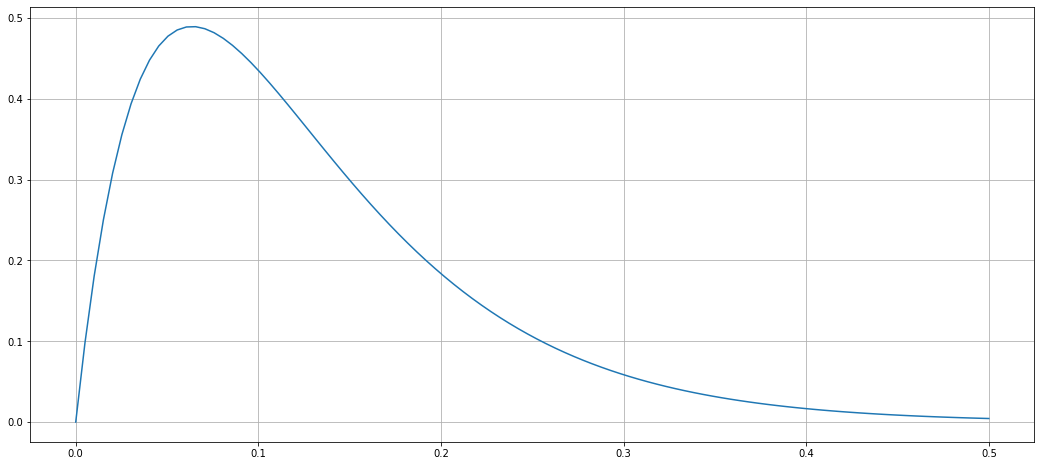

In [24]:
plt.figure(figsize=(18,8))

x_values = np.linspace(0,0.5, 100)
y_values = []

for i in x_values:
    y_values.append(total_solution_nonterminal.subs(t, i))
    
plt.plot(x_values, y_values)
plt.grid()
plt.show()

In [25]:
sp.integrate(total_solution_nonterminal, (t, 0, sp.oo)).evalf()

0.0854903526757074

In [26]:
sp.Eq(sp.Integral(R(t), (t, 0, sp.oo)), sp.integrate(total_solution_nonterminal, (t, 0, sp.oo)).evalf())

Eq(Integral(R(t), (t, 0, oo)), 0.0854903526757074)

In [27]:
term_list = []
T = 30
time = np.linspace(0, 0.5, T)

for i in range(100):
    a1 = ra
    a2 = ra - nb
    b1 = rb
    b2 = rb - nb
    
    x1 = a1
    x2 = a2
    y1 = b1
    y2 = b2
    
    term = [0]
    
    for t in time:
        p = np.random.choice([0,1,2], p=[1 - 1/la - 1/lb,1/la, 1/lb])
        
        if p == 0:
            term.append(term[-1])
        elif p == 1:
            if x1+x2 != 0 and y1+y2 != nb-1:
                if x2 != 0:
                    x2-=1
                    term.append(term[-1]+1)
                else:
                    x1-=1
                    term.append(term[-1]+1)
            else:
                term.append(term[-1])
        elif p == 2:
            if x1+x2 != 0 and y1+y2 != nb-1:
                if y2 != 0:
                    y2-=1
                    term.append(term[-1]+1)
                else:
                    y1-=1
                    term.append(term[-1]+1)
            else:
                term.append(term[-1])

            
    term_list.append(term)

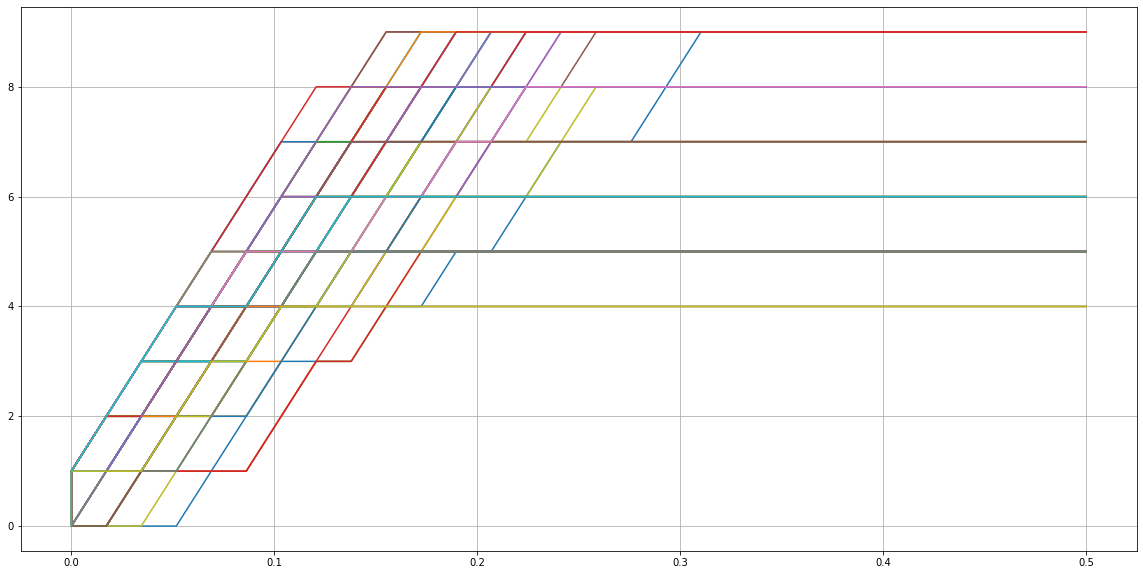

In [28]:
plt.figure(figsize=(20,10))

for i in term_list:
    plt.plot([0]+list(time), i)
    
plt.grid()

In [29]:
nonterm_time = []

for i in np.array(term_list) - np.array([term_list]).max(axis=2).T:
    nonterm_time.append(np.unique(i, return_counts=True)[1][-1]/T)

In [30]:
np.mean(nonterm_time)

0.6896666666666665

In [31]:
np.std(nonterm_time)

0.09221894237808921